In [11]:
import json
import numpy as np

In [12]:
file_path = 'E:/CASA/CASA0013/Assessment/data/export.geojson'

# 读取 GeoJSON 文件
with open(file_path, 'r', encoding='utf-8') as file:
    geojson_data = json.load(file)

# 准备一个列表来存储点坐标
point_coordinates = []

# 遍历特征集合中的每个特征
for feature in geojson_data.get('features', []):
    # 检查几何类型是否为点
    if feature['geometry']['type'] == 'Point':
        # 提取坐标
        coordinates = feature['geometry']['coordinates']
        point_coordinates.append(coordinates)

# 输出点坐标
for coord in point_coordinates:
    print(coord)

[-0.2902488, 51.3270878]
[-0.1452455, 51.3952047]
[-0.2526878, 51.3099991]
[-0.0882641, 51.5063878]
[0.1830395, 51.4327882]
[0.1964219, 51.3640151]
[0.1902348, 51.3530752]
[-0.1706494, 51.3553025]
[0.1602259, 51.448185]
[-0.4296177, 51.2994537]
[-0.1897429, 51.5660122]
[-0.127826, 51.5362114]
[-0.1181116, 51.5581844]
[0.2826033, 51.5519566]
[-0.0723316, 51.5234859]
[-0.115794, 51.5073583]
[-0.1159222, 51.5027478]
[-0.1519514, 51.5344338]
[-0.1473387, 51.5422262]
[-0.0867003, 51.5059746]
[-0.1568989, 51.534874]
[-0.1562863, 51.535064]
[0.0578495, 51.4073174]
[-0.1246172, 51.4999176]
[-0.1248415, 51.4988202]
[-0.2598771, 51.4846327]
[-0.2599498, 51.4844417]
[-0.423798, 51.6622838]
[-0.115674, 51.511658]
[-0.3397502, 51.3144816]
[-0.1167858, 51.3563639]
[-0.432978, 51.4669487]
[-0.1245721, 51.5007042]
[0.0690013, 51.5727753]
[-0.0548514, 51.3688863]
[-0.1239626, 51.5029707]
[-0.0753662, 51.5055166]
[-0.1192189, 51.5026002]
[-0.1584201, 51.5236013]
[-0.0608064, 51.519714]
[-0.0749624, 51.5

In [13]:
type(point_coordinates)

list

In [14]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [15]:
points = [Point(x, y) for x, y in point_coordinates]

# 创建一个 DataFrame
df = pd.DataFrame(point_coordinates, columns=['Longitude', 'Latitude'])

# 使用 DataFrame 和 Points 创建 GeoDataFrame
attraction_gdf = gpd.GeoDataFrame(df, geometry=points)

In [16]:
attraction_gdf

,Longitude,Latitude,geometry
0,-0.290249,51.327088,POINT (-0.29025 51.32709)
1,-0.145245,51.395205,POINT (-0.14525 51.39520)
2,-0.252688,51.309999,POINT (-0.25269 51.31000)
3,-0.088264,51.506388,POINT (-0.08826 51.50639)
4,0.183039,51.432788,POINT (0.18304 51.43279)
...,...,...,...
163,-0.153819,51.534180,POINT (-0.15382 51.53418)
164,-0.152869,51.534819,POINT (-0.15287 51.53482)
165,-0.152462,51.534664,POINT (-0.15246 51.53466)
166,-0.153867,51.533824,POINT (-0.15387 51.53382)


In [17]:
# Shapefile 路径
shapefile_path = 'E:/CASA/CASA0013/Assessment/data/London_Borough_Excluding_MHW/London_Borough_Excluding_MHW.shp'

# 加载 Shapefile
borough = gpd.read_file(shapefile_path)

# 查看数据
print(borough)

                      NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER  \
0     Kingston upon Thames  E09000021   3726.117       0.000         F   
1                  Croydon  E09000008   8649.441       0.000         F   
2                  Bromley  E09000006  15013.487       0.000         F   
3                 Hounslow  E09000018   5658.541      60.755         F   
4                   Ealing  E09000009   5554.428       0.000         F   
5                 Havering  E09000016  11445.735     210.763         F   
6               Hillingdon  E09000017  11570.063       0.000         F   
7                   Harrow  E09000015   5046.330       0.000         F   
8                    Brent  E09000005   4323.270       0.000         F   
9                   Barnet  E09000003   8674.837       0.000         F   
10                 Lambeth  E09000022   2724.940      43.927         T   
11               Southwark  E09000028   2991.340     105.139         T   
12                Lewisham  E09000023 

In [18]:
attraction_gdf.set_crs(epsg=4326, inplace=True)

,Longitude,Latitude,geometry
0,-0.290249,51.327088,POINT (-0.29025 51.32709)
1,-0.145245,51.395205,POINT (-0.14525 51.39520)
2,-0.252688,51.309999,POINT (-0.25269 51.31000)
3,-0.088264,51.506388,POINT (-0.08826 51.50639)
4,0.183039,51.432788,POINT (0.18304 51.43279)
...,...,...,...
163,-0.153819,51.534180,POINT (-0.15382 51.53418)
164,-0.152869,51.534819,POINT (-0.15287 51.53482)
165,-0.152462,51.534664,POINT (-0.15246 51.53466)
166,-0.153867,51.533824,POINT (-0.15387 51.53382)


In [90]:
# 确保两个 GeoDataFrame 使用相同的坐标参考系统
attraction_gdf = attraction_gdf.to_crs(borough.crs)

# 使用空间连接来统计每个多边形包含的点数
point_in_polygon = gpd.sjoin(attraction_gdf, borough, how='inner', op='within')

# 计算每个多边形包含的点数
count_points_in_polygon = point_in_polygon.groupby('GSS_CODE').size().reset_index(name='point_count')

# 显示结果
print(count_points_in_polygon)

     GSS_CODE  point_count
0   E09000001            4
1   E09000002            2
2   E09000003            2
3   E09000004            1
4   E09000006            3
5   E09000007            9
6   E09000008            3
7   E09000014            2
8   E09000016            2
9   E09000017            1
10  E09000018            3
11  E09000019            1
12  E09000020           11
13  E09000021            4
14  E09000022           15
15  E09000023            1
16  E09000024            1
17  E09000025            2
18  E09000026            2
19  E09000027            6
20  E09000028            7
21  E09000029            1
22  E09000030           11
23  E09000031            1
24  E09000032            1
25  E09000033           33


C:\Users\W\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


In [20]:
type(count_points_in_polygon)

pandas.core.frame.DataFrame

In [21]:
# 执行空间连接
point_in_polygon = gpd.sjoin(attraction_gdf, borough, how='inner', op='within')

# 对连接结果进行分组统计
count_points = point_in_polygon.groupby('GSS_CODE').size()

# 将计数结果转换为 DataFrame，并重置索引
count_points_df = count_points.reset_index(name='point_count')

# 保证所有多边形都包含在统计结果中
count_points_in_polygon = borough.merge(count_points_df, on='GSS_CODE', how='left')

# 将未包含点的多边形的点数设为零
count_points_in_polygon['point_count'].fillna(0, inplace=True)

# 显示结果
print(count_points_in_polygon[['GSS_CODE', 'point_count']])

     GSS_CODE  point_count
0   E09000021          4.0
1   E09000008          3.0
2   E09000006          3.0
3   E09000018          3.0
4   E09000009          0.0
5   E09000016          2.0
6   E09000017          1.0
7   E09000015          0.0
8   E09000005          0.0
9   E09000003          2.0
10  E09000022         15.0
11  E09000028          7.0
12  E09000023          1.0
13  E09000011          0.0
14  E09000004          1.0
15  E09000010          0.0
16  E09000031          1.0
17  E09000026          2.0
18  E09000029          1.0
19  E09000027          6.0
20  E09000024          1.0
21  E09000032          1.0
22  E09000013          0.0
23  E09000020         11.0
24  E09000033         33.0
25  E09000007          9.0
26  E09000030         11.0
27  E09000019          1.0
28  E09000012          0.0
29  E09000014          2.0
30  E09000025          2.0
31  E09000002          2.0
32  E09000001          4.0


C:\Users\W\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


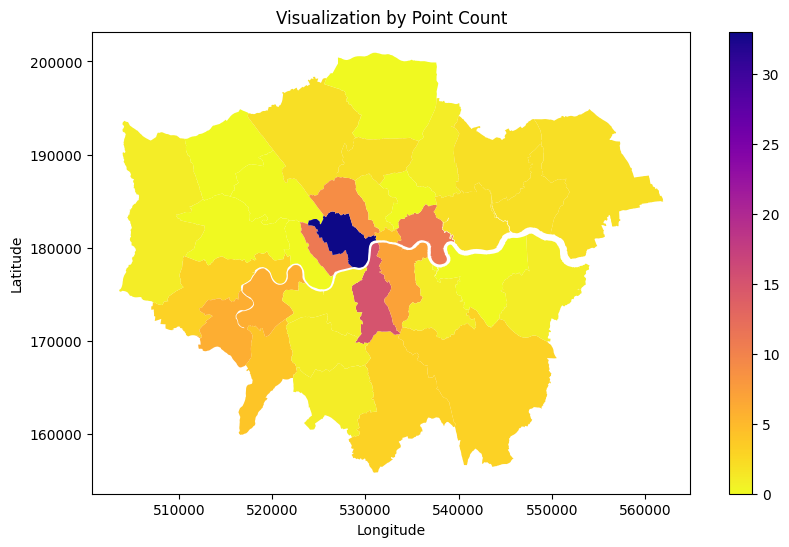

In [22]:
import matplotlib.pyplot as plt

# 假设 count_points_in_polygon 是您的 GeoDataFrame
# count_points_in_polygon 应该包含一个名为 'point_count' 的列

# 使用 'point_count' 列的值来设置颜色映射
# 'plasma' 是一个由浅至深的颜色映射，您可以根据需要选择其他颜色映射
count_points_in_polygon.plot(column='point_count', cmap='plasma_r', legend=True, figsize=(10, 6))

# 添加标题和标签（可选）
plt.title('Visualization by Point Count')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 显示图表
plt.show()

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

C:\Users\W\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


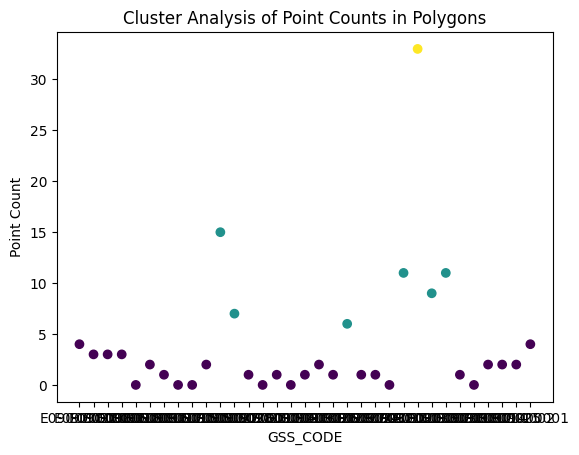

                      NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER  \
0     Kingston upon Thames  E09000021   3726.117       0.000         F   
1                  Croydon  E09000008   8649.441       0.000         F   
2                  Bromley  E09000006  15013.487       0.000         F   
3                 Hounslow  E09000018   5658.541      60.755         F   
4                   Ealing  E09000009   5554.428       0.000         F   
5                 Havering  E09000016  11445.735     210.763         F   
6               Hillingdon  E09000017  11570.063       0.000         F   
7                   Harrow  E09000015   5046.330       0.000         F   
8                    Brent  E09000005   4323.270       0.000         F   
9                   Barnet  E09000003   8674.837       0.000         F   
10                 Lambeth  E09000022   2724.940      43.927         T   
11               Southwark  E09000028   2991.340     105.139         T   
12                Lewisham  E09000023 

In [78]:
# 提取 point_count 作为聚类的特征
X = count_points_in_polygon[['point_count']].values

# 选择聚类的数量
n_clusters = 3

# 创建 KMeans 实例并拟合数据
kmeans = KMeans(n_clusters=n_clusters, random_state=44)
kmeans.fit(X)

# 将聚类标签添加到原始 DataFrame
count_points_in_polygon['cluster'] = kmeans.labels_

# 找到最小 point_count 的索引
min_point_count_cluster = kmeans.labels_[np.argmin(X)]

# 重新分配聚类标签，使最小 point_count 的聚类为 2
count_points_in_polygon['cluster'] = [(label + 1 if label >= min_point_count_cluster 
                                       else label) for label in count_points_in_polygon['cluster']]
count_points_in_polygon['cluster'] = count_points_in_polygon['cluster'].replace(min_point_count_cluster, 1)

# 可视化聚类结果（如果适用）
plt.scatter(count_points_in_polygon['GSS_CODE'], count_points_in_polygon['point_count'], c=count_points_in_polygon['cluster'])
plt.xlabel('GSS_CODE')
plt.ylabel('Point Count')
plt.title('Cluster Analysis of Point Counts in Polygons')
plt.show()

# 查看聚类结果
print(count_points_in_polygon)

In [79]:
count_points_in_polygon

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,point_count,cluster
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",4.0,1
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",3.0,1
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",3.0,1
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",3.0,1
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",0.0,1
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.900 181459.800, 549894.600 18...",2.0,1
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510615.200 19...",1.0,1
7,Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510660.000 19...",0.0,1
8,Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201.000 182512.600, 525181.500 18...",0.0,1
9,Barnet,E09000003,8674.837,0.000,F,None,None,"POLYGON ((524579.900 198355.200, 524594.300 19...",2.0,1


In [88]:
non_tourism_borough = count_points_in_polygon[count_points_in_polygon['cluster'] == 1]

In [84]:
type(count_points_in_polygon)

geopandas.geodataframe.GeoDataFrame

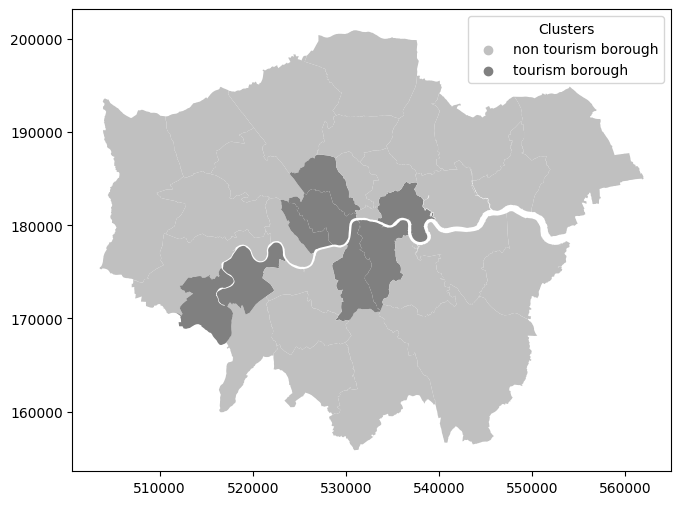

In [82]:
# 假设 count_points_in_polygon 是您的 GeoDataFrame
# count_points_in_polygon 应该包含一个名为 'cluster' 的列

# 设置颜色：cluster 等于 3 为一种颜色，其余为另一种颜色
colors = count_points_in_polygon['cluster'].map(lambda x: 'silver' if x == 1 else 'grey')

# 绘制 GeoDataFrame
count_points_in_polygon.plot(color=colors, figsize=(10, 6))

# 添加图例（可选）
plt.scatter([], [], color='silver', label='non tourism borough')
plt.scatter([], [], color='grey', label='tourism borough')
plt.legend(title='Clusters')

# 显示图表
plt.show()

In [177]:
expenditure_point = pd.read_csv('E:/CASA/CASA0013/Assessment/data/updated_data.csv')

C:\Users\W\AppData\Local\Temp\ipykernel_37764\1995890429.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  expenditure_point = pd.read_csv('E:/CASA/CASA0013/Assessment/data/updated_data.csv')


In [163]:
expenditure_point

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,local_or_company,estimated_annual_nights,estimated_annual_income,number_of_beds,tourists_expenditure,value_to_local_economy
0,13913,Rental unit in Islington · ★4.80 · 1 bedroom ·...,54730,Alina,NaN,Islington,51.568610,-0.112700,Private room,79,...,2,360,11,NaN,1,18.463562,1458.621370,1,1846.356164,8844.784570
1,15400,Rental unit in London · ★4.80 · 1 bedroom · 1 ...,60302,Philippa,NaN,Kensington and Chelsea,51.487800,-0.168130,Entire home/apt,150,...,1,73,5,NaN,1,8.064000,1209.600000,1,806.400000,4870.656000
2,92644,Rental unit in Earlsfield · ★4.57 · 1 bedroom ...,498201,Dee Dee,NaN,Wandsworth,51.442010,-0.187390,Private room,42,...,1,217,9,NaN,1,62.067945,2606.853699,1,6206.794521,25691.163879
3,17402,Rental unit in London · ★4.76 · 3 bedrooms · 3...,67564,Liz,NaN,Westminster,51.521950,-0.140940,Entire home/apt,476,...,9,300,4,NaN,0,21.304110,10140.756164,3,6391.232877,25380.864000
4,93015,Rental unit in Hammersmith · ★4.82 · 2 bedroom...,499704,Sarah,NaN,Hammersmith and Fulham,51.499930,-0.217070,Entire home/apt,175,...,1,40,2,NaN,1,2.130411,372.821918,2,426.082192,2104.846027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87942,973781286754517228,Rental unit in Greater London · ★New · 1 bedro...,498408783,Sal,NaN,Westminster,51.514860,-0.135980,Entire home/apt,275,...,2,239,0,NaN,1,0.000000,0.000000,1,0.000000,0.000000
87943,973801695874775338,Rental unit in Greater London · ★New · 1 bedro...,36645347,Josie,NaN,Southwark,51.459042,-0.055458,Entire home/apt,145,...,1,88,0,NaN,1,0.000000,0.000000,1,0.000000,0.000000
87944,973811685656289740,Home in Greater London · ★New · 1 bedroom · 5 ...,340514057,Mal,NaN,Merton,51.406100,-0.236126,Private room,160,...,1,80,0,NaN,1,0.000000,0.000000,1,0.000000,0.000000
87945,973882998775927897,Home in Greater London · ★New · 5 bedrooms · 5...,439074505,Travelnest,NaN,Hounslow,51.450997,-0.444319,Entire home/apt,680,...,170,364,0,NaN,0,0.000000,0.000000,5,0.000000,0.000000


In [178]:
selected_expenditure_point_columns = expenditure_point[['id','latitude', 'longitude', 'tourists_expenditure']]
print(selected_expenditure_point_columns.dtypes)

id                        int64
latitude                float64
longitude               float64
tourists_expenditure    float64
dtype: object


In [183]:
selected_expenditure_point_columns['latitude'] = pd.to_numeric(selected_expenditure_point_columns['latitude'], errors='coerce')
selected_expenditure_point_columns['longitude'] = pd.to_numeric(selected_expenditure_point_columns['longitude'], errors='coerce')

selected_expenditure_point_columns.dropna(inplace=True)

C:\Users\W\AppData\Local\Temp\ipykernel_37764\2137308440.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_expenditure_point_columns['latitude'] = pd.to_numeric(selected_expenditure_point_columns['latitude'], errors='coerce')
C:\Users\W\AppData\Local\Temp\ipykernel_37764\2137308440.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_expenditure_point_columns['longitude'] = pd.to_numeric(selected_expenditure_point_columns['longitude'], errors='coerce')
C:\Users\W\AppData\Local\Temp\ipyker

In [184]:
# convert lat/long to GeoSeries (converted the InsideAirbnb data to a GeoDataFrame)
expenditure_gdf = gpd.GeoDataFrame(selected_expenditure_point_columns, 
      geometry=gpd.points_from_xy(selected_expenditure_point_columns.longitude, selected_expenditure_point_columns.latitude, crs='epsg:4326'))

# plot and reproject it

expenditure_gdf = expenditure_gdf.to_crs('epsg:27700')
print(expenditure_gdf.crs)

epsg:27700


In [185]:
import matplotlib.pyplot as plt

In [186]:
print(expenditure_gdf.crs)
print(borough.crs)
print(non_tourism_borough.crs)

epsg:27700
PROJCS["OSGB36 / British National Grid",GEOGCS["OSGB36",DATUM["Ordnance_Survey_of_Great_Britain_1936",SPHEROID["Airy 1830",6377563.396,299.3249646,AUTHORITY["EPSG","7001"]],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.999601272],PARAMETER["false_easting",400000],PARAMETER["false_northing",-100000],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
PROJCS["OSGB36 / British National Grid",GEOGCS["OSGB36",DATUM["Ordnance_Survey_of_Great_Britain_1936",SPHEROID["Airy 1830",6377563.396,299.3249646,AUTHORITY["EPSG","7001"]],AUTHORITY["EPSG","6277"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",49],PARAMETER["central_meridian",-2],PARAMETER["scale_factor",0.999601272],PARAMETER["false_easting",400000],PARAMET

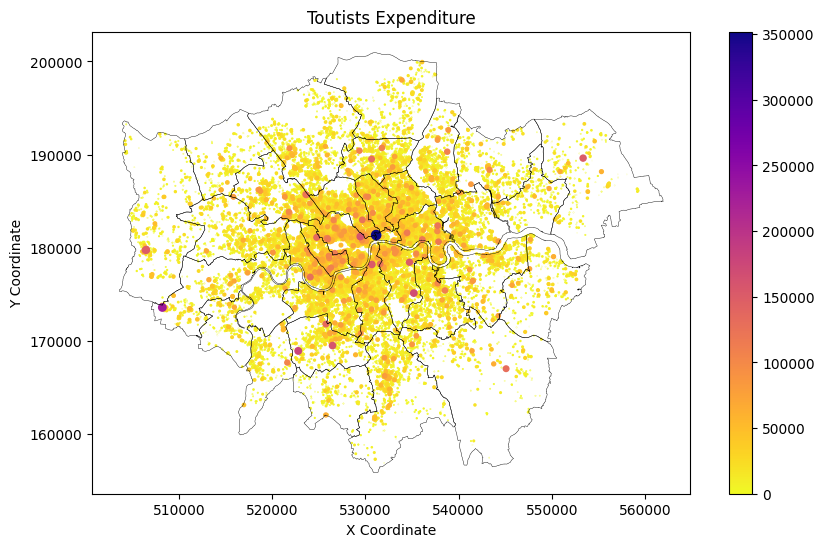

In [187]:

# 提取x和y坐标
x_coords = expenditure_gdf['geometry'].apply(lambda point: point.x)
y_coords = expenditure_gdf['geometry'].apply(lambda point: point.y)


A_sorted = expenditure_gdf.sort_values(by='tourists_expenditure')

plt.figure(figsize=(10, 6))

point_sizes = A_sorted['tourists_expenditure'] / 8000


borough.boundary.plot(ax=plt.gca(), edgecolor='black', linewidth=0.3)



# 使用列C的数值作为颜色
plt.scatter(x_coords, y_coords, c=A_sorted['tourists_expenditure'], cmap='plasma_r', s=point_sizes)

# 添加颜色条
plt.colorbar()

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Toutists Expenditure')
plt.show()

<Axes: >

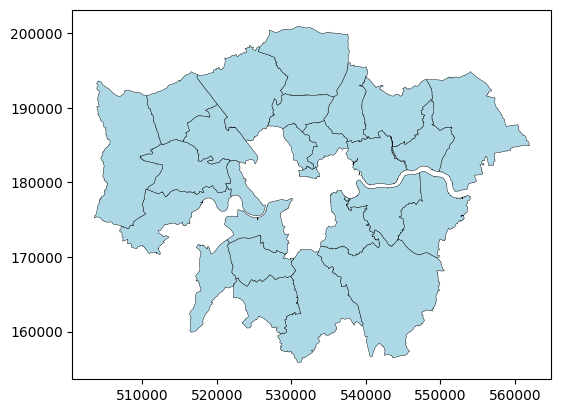

In [188]:
non_tourism_borough.boundary.plot(ax=plt.gca(), edgecolor='black', linewidth=0.3, facecolor='lightblue')

In [192]:
expenditure_non = gpd.sjoin(expenditure_gdf, non_tourism_borough, predicate='within')

C:\Users\W\AppData\Local\Temp\ipykernel_37764\2770567526.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:27700
Right CRS: PROJCS["OSGB36 / British National Grid",GEOGCS["OS ...

  expenditure_non = gpd.sjoin(expenditure_gdf, non_tourism_borough, predicate='within')


<Axes: >

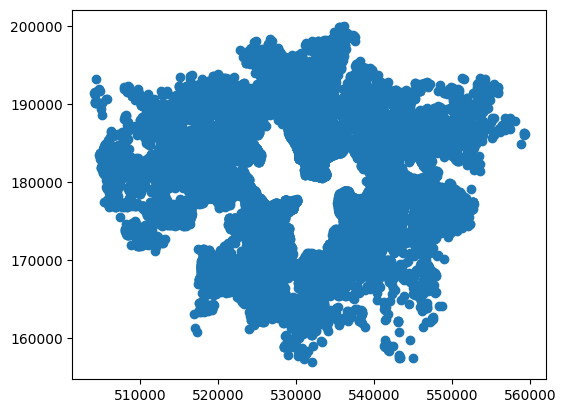

In [193]:
expenditure_non.plot()

In [111]:
# 确保两个 GeoDataFrame 使用相同的坐标参考系统
expenditure_non = expenditure_non.to_crs(non_tourism_borough.crs)

# 使用空间连接
expenditure_non_borough = gpd.sjoin(expenditure_non, non_tourism_borough, how='inner', op='within')


C:\Users\W\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\interactiveshell.py:3466: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


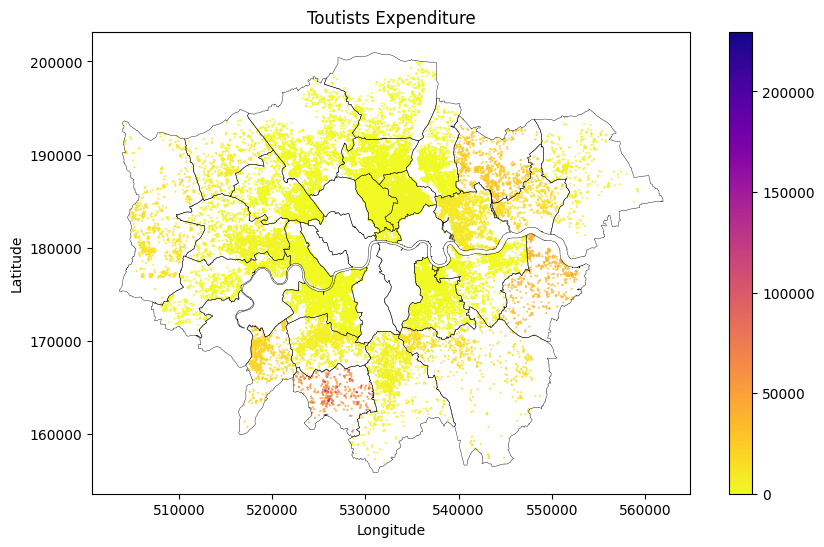

In [201]:

# 提取x和y坐标
x_coords = expenditure_non['geometry'].apply(lambda point: point.x)
y_coords = expenditure_non['geometry'].apply(lambda point: point.y)


A_sorted = expenditure_non.sort_values(by='tourists_expenditure')

plt.figure(figsize=(10, 6))



borough.boundary.plot(ax=plt.gca(), edgecolor='black', linewidth=0.3)



# 使用列C的数值作为颜色
plt.scatter(x_coords, y_coords, c=A_sorted['tourists_expenditure'], cmap='plasma_r', s=0.2)

# 添加颜色条
plt.colorbar()

plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Toutists Expenditure')
plt.show()

In [200]:
expenditure_non

,id,latitude,longitude,tourists_expenditure,geometry,index_right,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,point_count,cluster
0,13913,51.568610,-0.112700,1846.356164,POINT (530901.013 187213.787),27,Islington,E09000019,1485.664,0.0,T,None,None,1.0,1
32,111840,51.562210,-0.116870,0.000000,POINT (530630.351 186494.630),27,Islington,E09000019,1485.664,0.0,T,None,None,1.0,1
85,179312,51.551910,-0.114970,0.000000,POINT (530791.564 185352.621),27,Islington,E09000019,1485.664,0.0,T,None,None,1.0,1
96,81052,51.539170,-0.102210,0.000000,POINT (531712.937 183958.761),27,Islington,E09000019,1485.664,0.0,T,None,None,1.0,1
99,201463,51.535610,-0.113380,135.123288,POINT (530948.543 183542.840),27,Islington,E09000019,1485.664,0.0,T,None,None,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86650,965685789104358339,51.370751,-0.177418,0.000000,POINT (526963.528 165097.435),18,Sutton,E09000029,4384.698,0.0,F,None,None,1.0,1
86840,967364380893458530,51.366981,-0.195942,0.000000,POINT (525684.534 164646.294),18,Sutton,E09000029,4384.698,0.0,F,None,None,1.0,1
86903,967997156221529075,51.364700,-0.147588,0.000000,POINT (529056.809 164476.530),18,Sutton,E09000029,4384.698,0.0,F,None,None,1.0,1
87190,969380028696101597,51.357500,-0.191520,0.000000,POINT (526018.321 163599.574),18,Sutton,E09000029,4384.698,0.0,F,None,None,1.0,1


In [203]:
grouped_data = expenditure_non.groupby('GSS_CODE')['tourists_expenditure'].sum().reset_index()

     GSS_CODE  tourists_expenditure
0   E09000001          2.277317e+06
1   E09000002          2.076119e+06
2   E09000003          7.308083e+06
3   E09000004          2.219661e+06
4   E09000005          8.899467e+06
5   E09000006          2.865359e+06
6   E09000008          5.607526e+06
7   E09000009          7.776561e+06
8   E09000010          3.367050e+06
9   E09000011          7.729057e+06
10  E09000012          1.526681e+07
11  E09000013          1.254572e+07
12  E09000014          7.741376e+06
13  E09000015          1.818208e+06
14  E09000016          1.860640e+06
15  E09000017          3.846790e+06
16  E09000018          4.794916e+06
17  E09000019          1.266765e+07
18  E09000021          2.617115e+06
19  E09000023          7.349491e+06
20  E09000024          3.928130e+06
21  E09000025          7.790507e+06
22  E09000026          3.077996e+06
23  E09000029          1.157026e+06
24  E09000031          4.323530e+06
25  E09000032          1.252752e+07


In [204]:
merged_data = borough.merge(grouped_data, on='GSS_CODE')

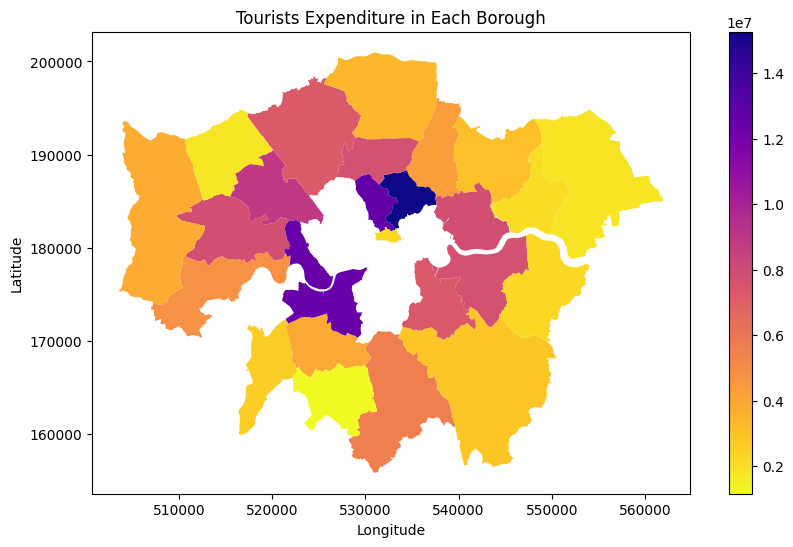

In [206]:
merged_data.plot(column='tourists_expenditure', cmap='plasma_r', legend=True, figsize=(10, 6))

# 添加标题和标签（可选）
plt.title('Tourists Expenditure in Each Borough')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# 显示图表
plt.show()

C:\Users\W\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


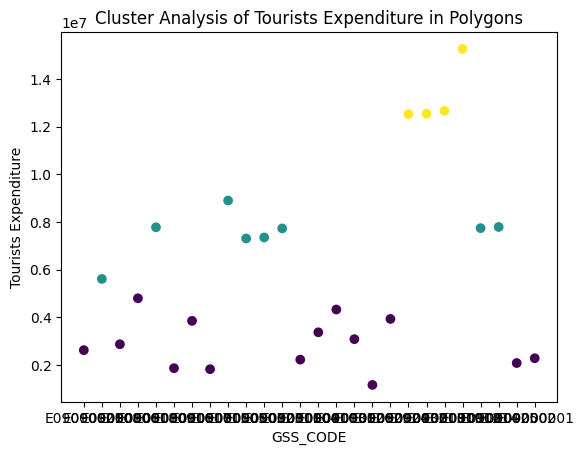

                      NAME   GSS_CODE   HECTARES  NONLD_AREA ONS_INNER  \
0     Kingston upon Thames  E09000021   3726.117       0.000         F   
1                  Croydon  E09000008   8649.441       0.000         F   
2                  Bromley  E09000006  15013.487       0.000         F   
3                 Hounslow  E09000018   5658.541      60.755         F   
4                   Ealing  E09000009   5554.428       0.000         F   
5                 Havering  E09000016  11445.735     210.763         F   
6               Hillingdon  E09000017  11570.063       0.000         F   
7                   Harrow  E09000015   5046.330       0.000         F   
8                    Brent  E09000005   4323.270       0.000         F   
9                   Barnet  E09000003   8674.837       0.000         F   
10                Lewisham  E09000023   3531.706      16.795         T   
11               Greenwich  E09000011   5044.190     310.785         F   
12                  Bexley  E09000004 

In [248]:
# 提取 point_count 作为聚类的特征
X = merged_data[['tourists_expenditure']].values

# 选择聚类的数量
n_clusters = 3

# 创建 KMeans 实例并拟合数据
kmeans = KMeans(n_clusters=n_clusters, random_state=47)
kmeans.fit(X)

# 将聚类标签添加到原始 DataFrame
merged_data['cluster'] = kmeans.labels_


# 可视化聚类结果（如果适用）
plt.scatter(merged_data['GSS_CODE'], merged_data['tourists_expenditure'], c=merged_data['cluster'])
plt.xlabel('GSS_CODE')
plt.ylabel('Tourists Expenditure')
plt.title('Cluster Analysis of Tourists Expenditure in Polygons')
plt.show()


# 查看聚类结果
print(merged_data)

In [249]:
merged_data

,NAME,GSS_CODE,HECTARES,NONLD_AREA,ONS_INNER,SUB_2009,SUB_2006,geometry,tourists_expenditure,cluster
0,Kingston upon Thames,E09000021,3726.117,0.000,F,None,None,"POLYGON ((516401.600 160201.800, 516407.300 16...",2.617115e+06,0
1,Croydon,E09000008,8649.441,0.000,F,None,None,"POLYGON ((535009.200 159504.700, 535005.500 15...",5.607526e+06,1
2,Bromley,E09000006,15013.487,0.000,F,None,None,"POLYGON ((540373.600 157530.400, 540361.200 15...",2.865359e+06,0
3,Hounslow,E09000018,5658.541,60.755,F,None,None,"POLYGON ((521975.800 178100.000, 521967.700 17...",4.794916e+06,0
4,Ealing,E09000009,5554.428,0.000,F,None,None,"POLYGON ((510253.500 182881.600, 510249.900 18...",7.776561e+06,1
5,Havering,E09000016,11445.735,210.763,F,None,None,"POLYGON ((549893.900 181459.800, 549894.600 18...",1.860640e+06,0
6,Hillingdon,E09000017,11570.063,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510615.200 19...",3.846790e+06,0
7,Harrow,E09000015,5046.330,0.000,F,None,None,"POLYGON ((510599.800 191689.500, 510660.000 19...",1.818208e+06,0
8,Brent,E09000005,4323.270,0.000,F,None,None,"POLYGON ((525201.000 182512.600, 525181.500 18...",8.899467e+06,1
9,Barnet,E09000003,8674.837,0.000,F,None,None,"POLYGON ((524579.900 198355.200, 524594.300 19...",7.308083e+06,1


<Axes: >

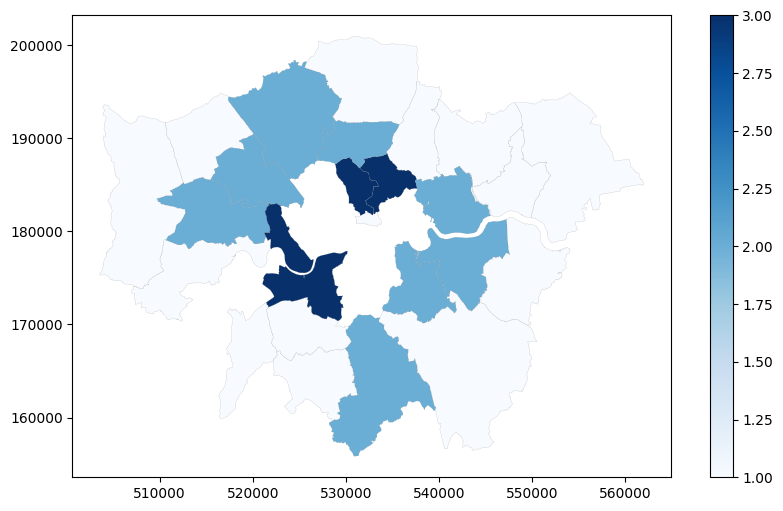

In [291]:


# 绘制 GeoDataFrame
merged_data.plot(column='cluster', cmap='Blues', legend=True, figsize=(10, 6), linewidths=0.1, edgecolor='grey')



